CSC536: Data Viz. Fundamentals

SIT@KMUTT

2023

In [15]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib 
# and integrates closely with pandas data structures

# Ref: https://seaborn.pydata.org/introduction.html
# Also, ref: Interactive data visualization with Python, Abha Belorkar et al., Packt Publishing, 2020

# The built-in plotting tool of Pandas is ...
a useful exploratory tool to generate figures that are not ready for primetime but useful to understand the dataset you are working with. 

Seaborn, on the other hand, has APIs to draw a wide variety of aesthetically pleasing plots.

# Diamond dataset

price
- price in US dollars (\$326--\$18,823)

carat
- weight of the diamond (0.2--5.01)

cut
- quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color
- diamond colour, from J (worst) to D (best)

clarity
- a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x
- length in mm (0--10.74)

y
- width in mm (0--58.9)

z
- depth in mm (0--31.8)

depth
- total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

In [29]:
# Apply the default theme
sns.set_theme()

diamonds_df = sns.load_dataset('diamonds')
# diamonds_df.head()
diamonds_df


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<Axes: title={'center': 'carat'}>]], dtype=object)

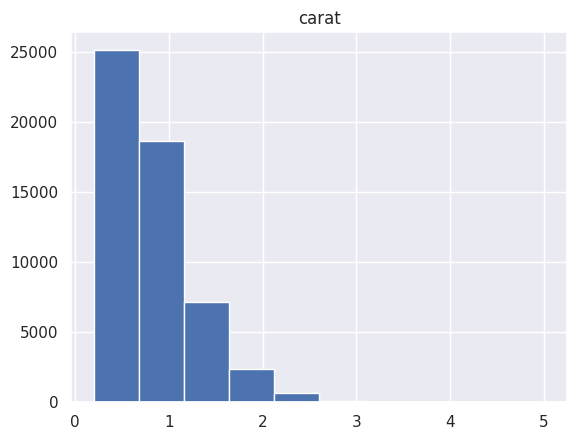

In [18]:
# plot a histogram of 'Carat' attribute.

diamonds_df.hist(column='carat')  # default number of bins is 10

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

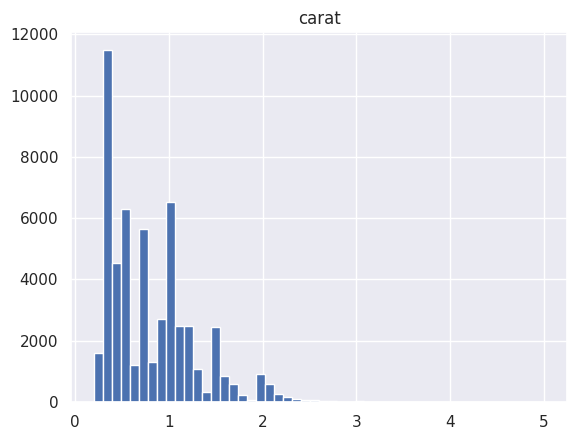

In [19]:
diamonds_df.hist(column='carat', bins=50)


<ipython-input-20-2fa73b30d219>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_df.carat, color='red')


<Axes: xlabel='carat', ylabel='Density'>

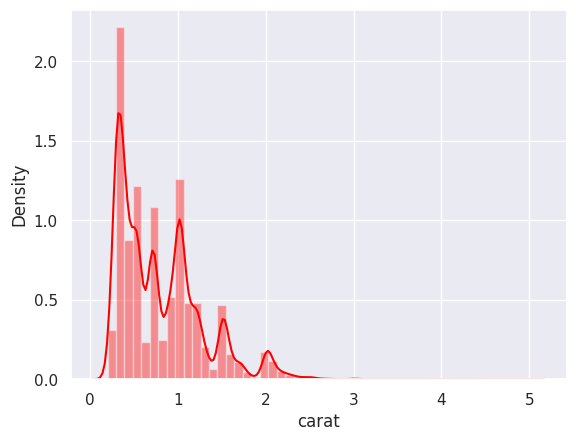

In [20]:
# distribution plot

# Usually, a KDE doesn't tell us anything more than what we can infer from the histogram itself. However, it is 
# helpful when comparing multiple histograms on the same plot. If we want to remove the KDE and look at the histogram alone, 
# we can set the kde=False.

sns.distplot(diamonds_df.carat, color='red')

<ipython-input-21-37b2ca1800a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_df.price, kde=False)


<Axes: xlabel='price'>

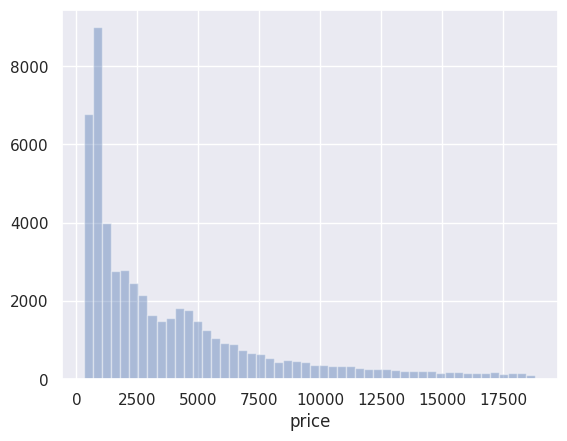

In [21]:

sns.distplot(diamonds_df.price, kde=False)


<ipython-input-22-1373c4e37d11>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(diamonds_df.price), kde=True)


<Axes: xlabel='price', ylabel='Density'>

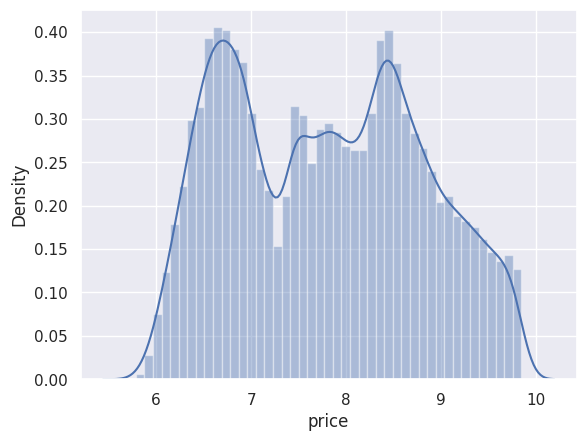

In [22]:
# A log transformation helps in identifying more trends.
# Here there are two peaks indicating two kinds of diamonds—one with a 
# high price and another with a low price

sns.distplot(np.log(diamonds_df.price), kde=True)

In [23]:
# now, let's look at a bar plot
diamonds_df.cut.unique()


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [24]:

diamonds_df.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [25]:
# Get the counts/frequencies of diamonds of each cut quality
# Use 'crosstab' function

cut_count_table = pd.crosstab(index=diamonds_df['cut'],columns='count')
cut_count_table


col_0,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


<Axes: xlabel='cut'>

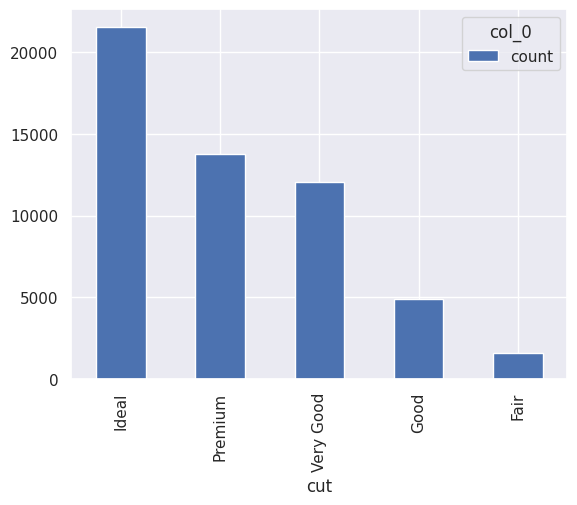

In [26]:
cut_count_table.plot(kind='bar')

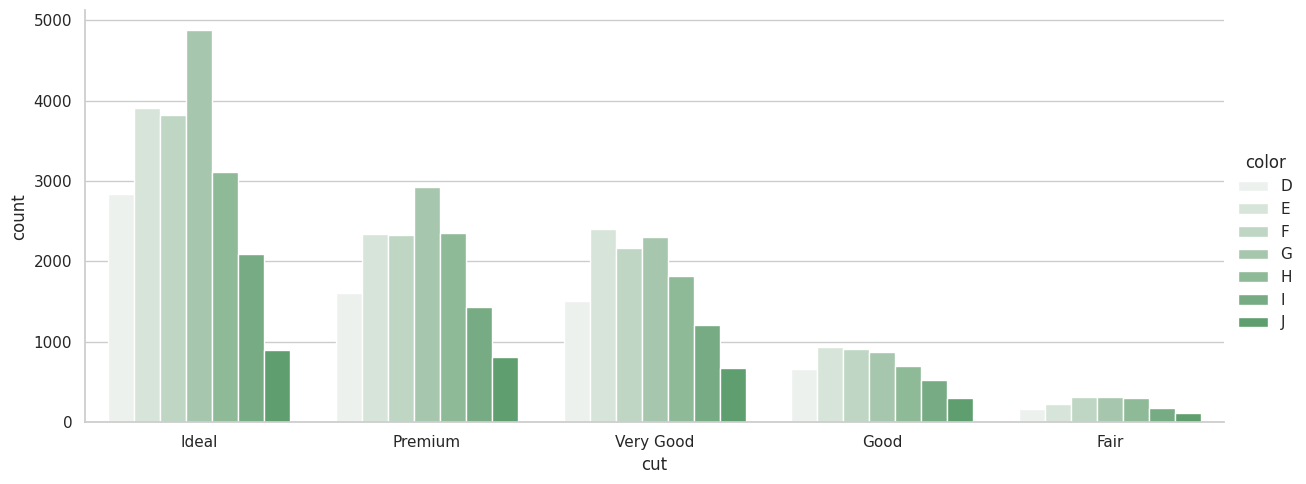

In [57]:
# use Seaborn to plot
# Categorical plot
# It shows the relationship between a numerical and one or more categorical variables

sns.catplot(data=diamonds_df, x="cut", aspect=2.5, kind="count", color="g", hue='color')  # set kind as count/frequency


1 13791


Text(1.5, 16791, 'Very good polish and symmetry ratings;\nreflects almost all the light that enters it')

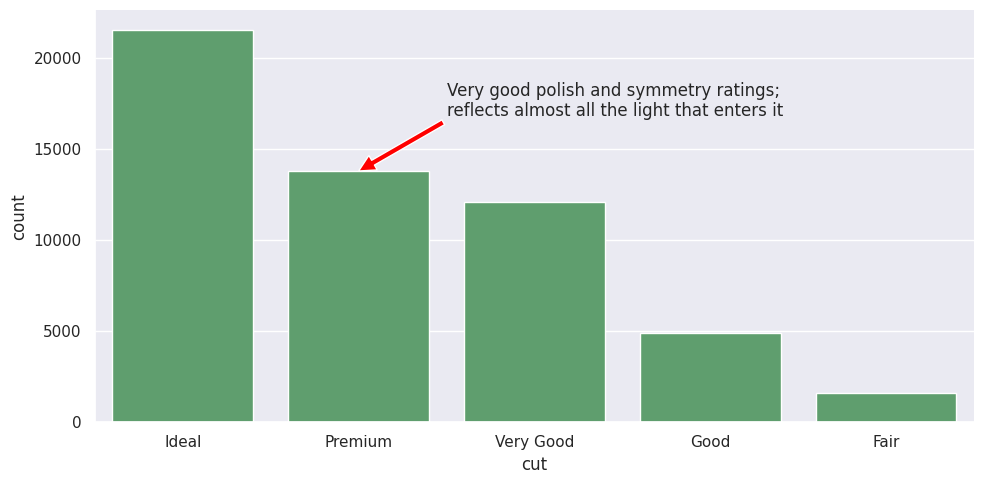

In [42]:
# let's try to add an annotation
premium_group = diamonds_df.loc[diamonds_df['cut']=='Premium']
x = premium_group.index.tolist()[0]
y = len(premium_group)
print(x, y)

sns.catplot(x="cut", data=diamonds_df, aspect=2, kind="count", color="g")
plt.annotate('Very good polish and symmetry ratings;\nreflects almost all the light that enters it', xy=(x,y), xytext=(x+0.5, y+3000), 
arrowprops=dict(facecolor='red'))

<ipython-input-54-de5379ebd714>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=np.mean, ci=95)   # default confidence interval (CI) = 95%


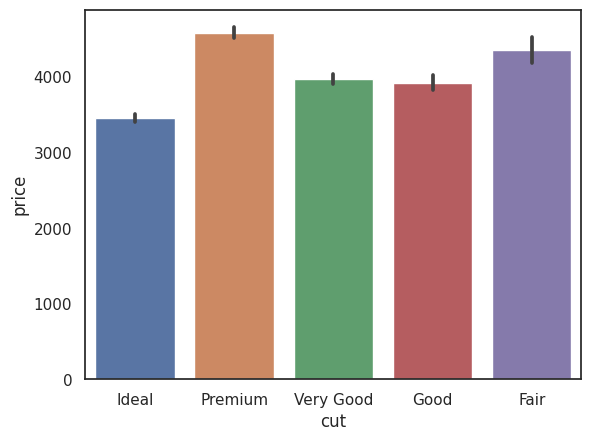

In [54]:
# Get the mean price distribution of different cut qualities
sns.set(style="white")  #  style must be one of white, dark, whitegrid, darkgrid, ticks
ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=np.mean, ci=95)   # default confidence interval (CI) = 95%

# Or try this approach via the catplot()
# sns.catplot(x="cut", y="price", data=diamonds_df,estimator=np.mean, ci=95,kind='bar')

# Note: The black lines (error bars) on the rectangles indicate the uncertainty (or spread of values) around the mean estimate. 
# By default, this value is set to 95% confidence, but feel free to change, say, ci=68.

<ipython-input-55-d1ab94d9941e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=np.mean, ci=None)   # No error bars shown


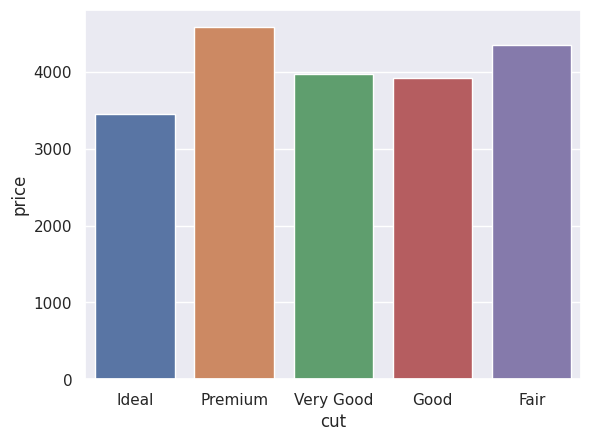

In [55]:
# Get the mean price distribution of different cut qualities
sns.set(style="darkgrid")  #  style must be one of white, dark, whitegrid, darkgrid, ticks
ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=np.mean, ci=None)   # No error bars shown


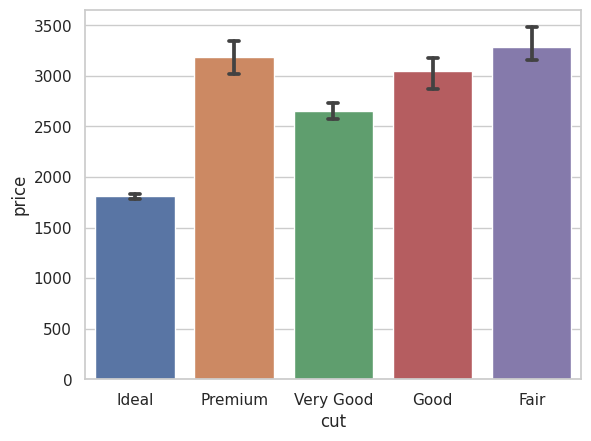

In [56]:
# Get the median prices of different cut qualities
sns.set(style="whitegrid")  #  style must be one of white, dark, whitegrid, darkgrid, ticks
ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=np.median, capsize=0.1) # add caps to the error bars

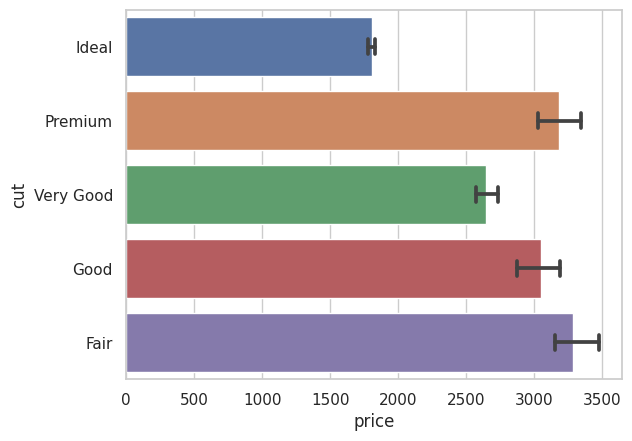

In [58]:
# Horizontal bar plots; simply make x values of numerical types instead.

sns.set(style="whitegrid")  #  style must be one of white, dark, whitegrid, darkgrid, ticks
x = sns.barplot(x="price", y="cut", data=diamonds_df,estimator=np.median, capsize=0.2) #

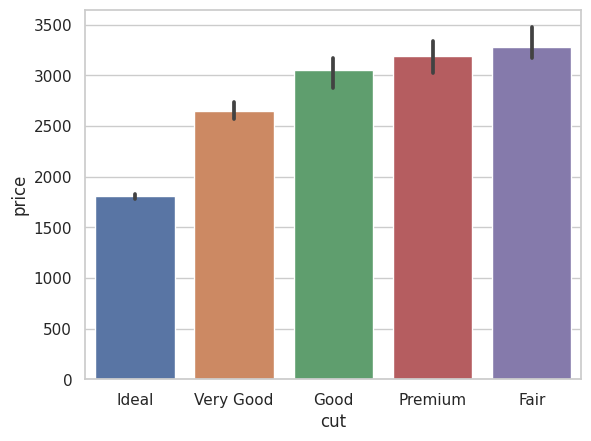

In [59]:
# We can order as wished

ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=np.median, order= ['Ideal','Very Good','Good','Premium','Fair'])

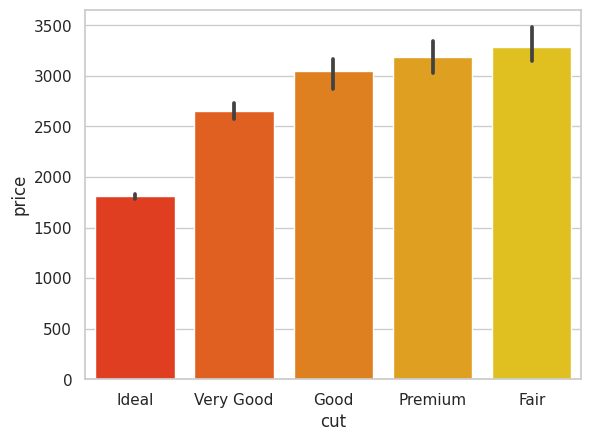

In [60]:
# Use a different color palette for the bars

ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=np.median, 
                 order= ['Ideal','Very Good','Good','Premium','Fair'], palette="autumn")

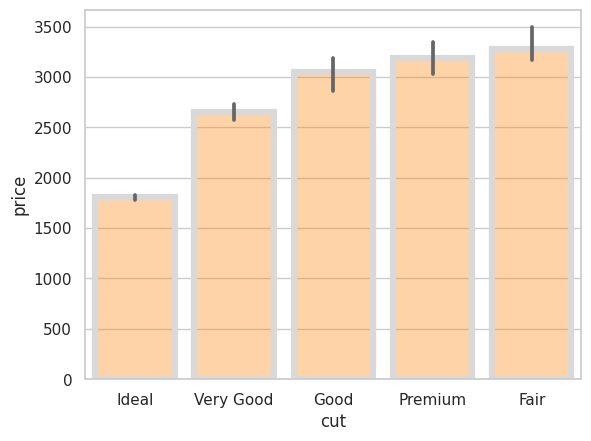

In [61]:
# Control display styles

ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=np.median, 
                 order= ['Ideal','Very Good','Good','Premium','Fair'],
                 linewidth=4.5, facecolor=(1, 0.5, 0, 0.34),  # r,g,b,a
                 errcolor="0.4", edgecolor="0.85")  # 0 is black, 1 is white, gray is in between


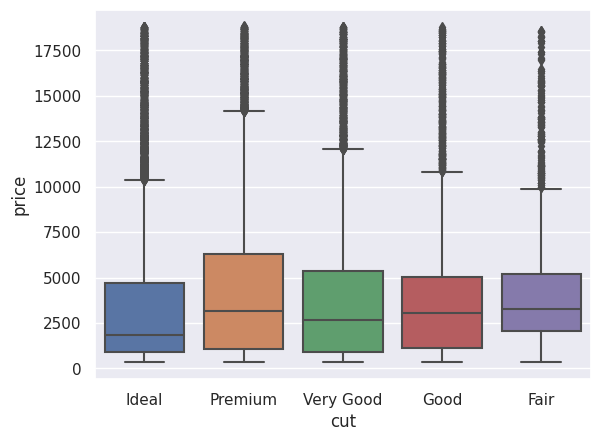

In [62]:
# try a simple boxplot
sns.set(style="darkgrid")  #  style must be one of white, dark, whitegrid, darkgrid, ticks
ax = sns.boxplot(x="cut", y="price", data=diamonds_df)

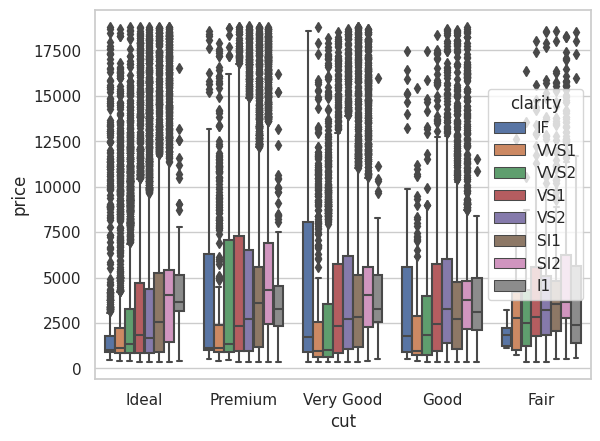

In [63]:
# More overview comparisons
# A histogram which is grouped by clarity
# Use the hue parameter to group

sns.set(style="whitegrid")  #  style must be one of white, dark, whitegrid, darkgrid, ticks
ax = sns.boxplot(x="cut", y="price", hue= "clarity", data=diamonds_df)


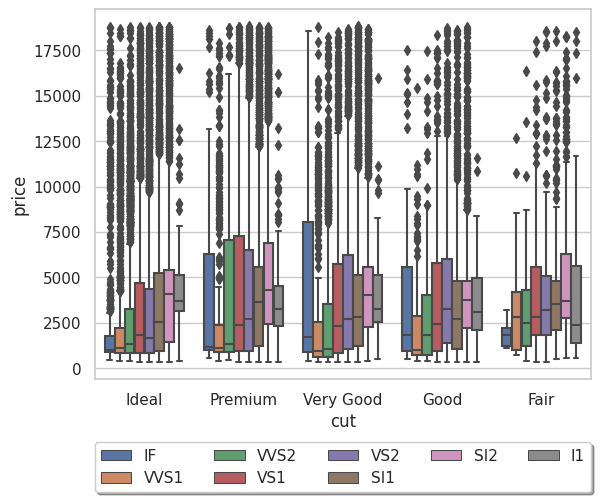

In [64]:
# Let's adjust the location of the legend

sns.set(style="whitegrid")  #  style must be one of white, dark, whitegrid, darkgrid, ticks
ax = sns.boxplot(x="cut", y="price", hue= "clarity", data=diamonds_df)

# We can place the legend at different locations with respect to the bounding box, which is
# by default extending from (0,0) to (1,1) of the bouding box in axes coordinates

# Put a legend to the upper center.
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fancybox=True, shadow=True)

# Or put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1.05, 1))

# Or try to put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)


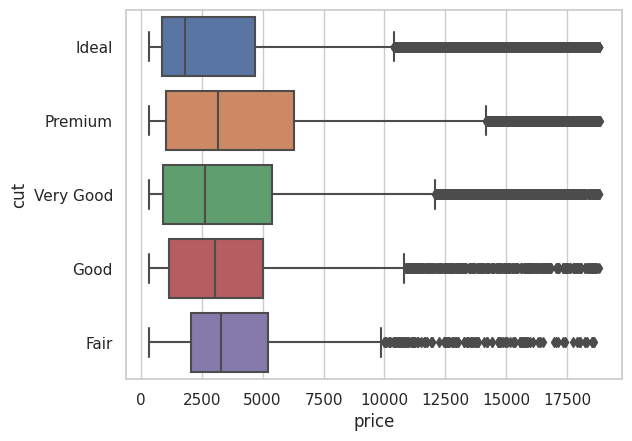

In [65]:
ax = sns.boxplot(y="cut", x="price", data=diamonds_df)


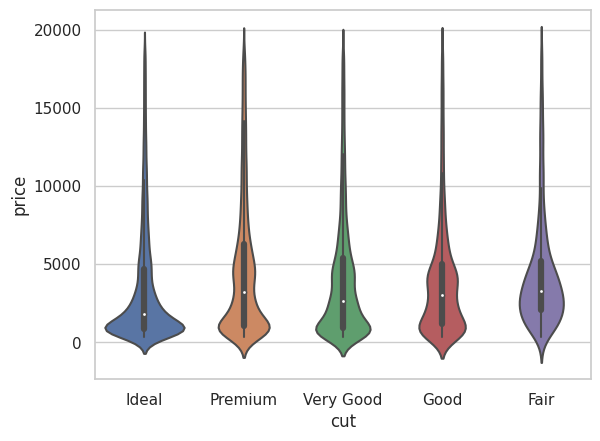

In [66]:
# Violin Plot: A combination of boxplot and kernel density estimate (KDE). 

# A violin plot plays a similar role as a box and whisker plot. 
# It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

# Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features 
# a kernel density estimation of the underlying distribution. This can be an effective and attractive way to show 
# multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by 
# the sample size, and violins for relatively small samples might look misleadingly smooth

ax = sns.violinplot(x="cut", y="price", data=diamonds_df)

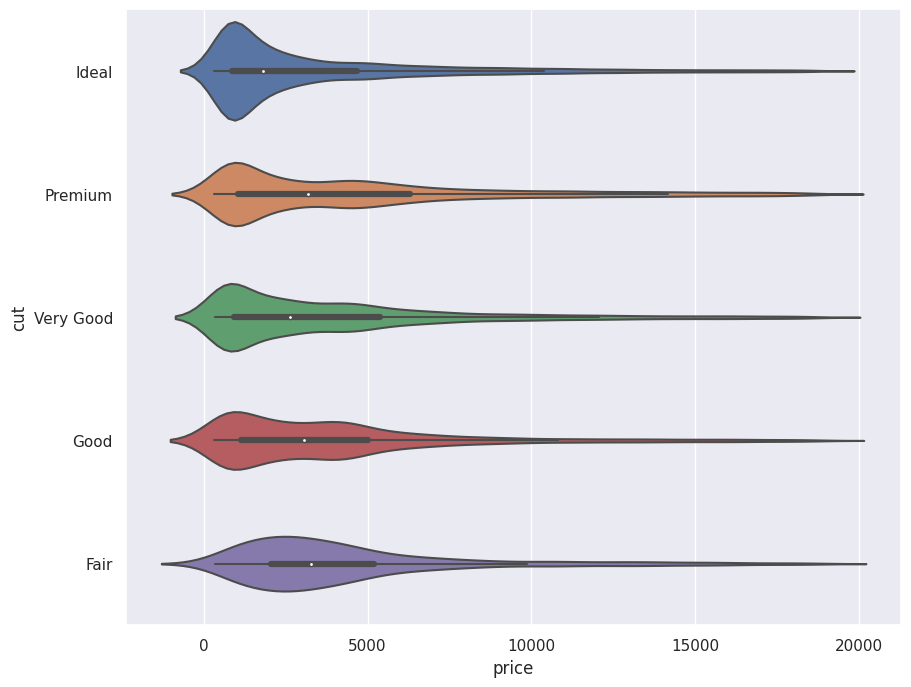

In [67]:
# Adjust the figure size.
# Horizontal bar plots; simply make x values of numerical types instead.


sns.set(rc={'figure.figsize':(10,8)})  # set a figure size as needed
ax = sns.violinplot(x="price", y="cut", data=diamonds_df)


<ipython-input-68-0867f5ec3fbd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gc.price, kde=False)  # draw a histogram


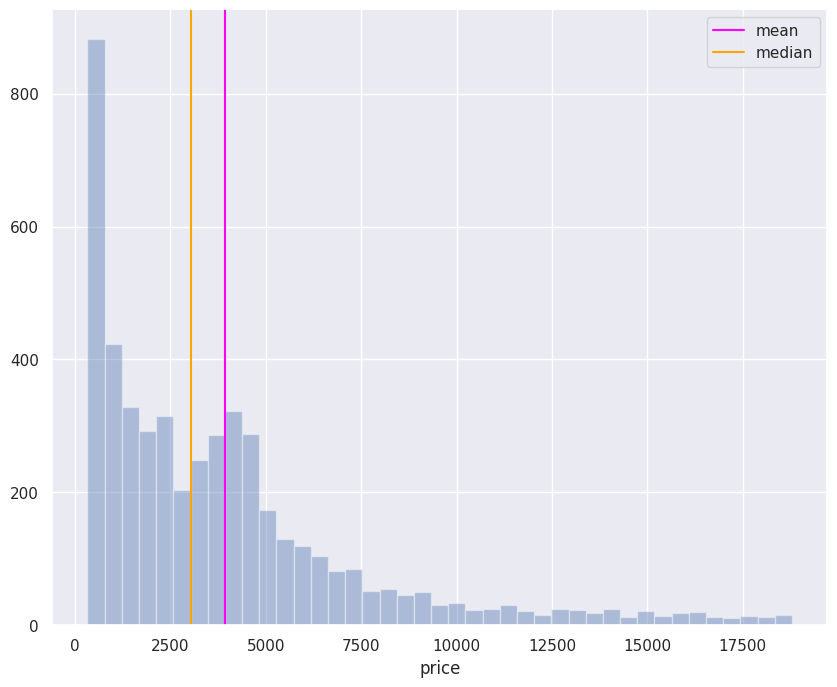

In [68]:
# Let's try to look into just one cut type.
# Select all rows with specific cut.

gc = diamonds_df.loc[diamonds_df['cut'] == 'Good']
sns.distplot(gc.price, kde=False)  # draw a histogram

# Add some statistical lines overlaying a histogram plot
# The axvline is used to add a vertical line across the axis.

plt.axvline(x=np.mean(gc.price), color='magenta', label='mean')
plt.axvline(x=np.median(gc.price), color='orange', label='median')
plt.legend(loc='upper right')


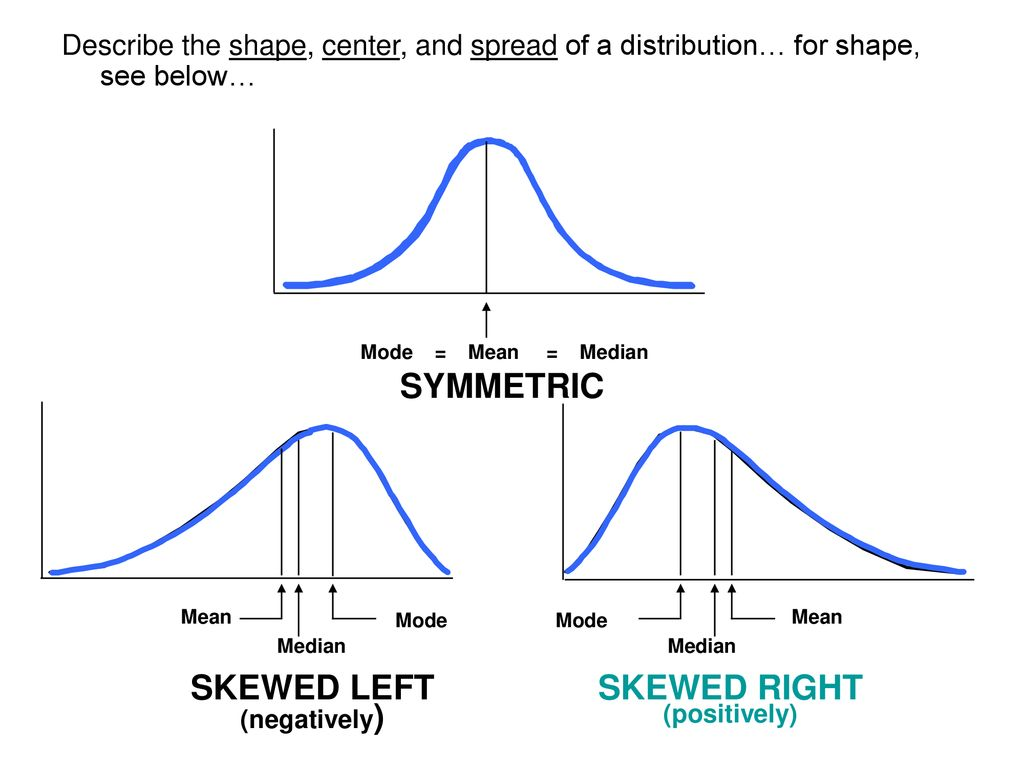
Credit: http://ceadserv1.nku.edu/longa/classes/sta205/days/images/skewleftright.jpg

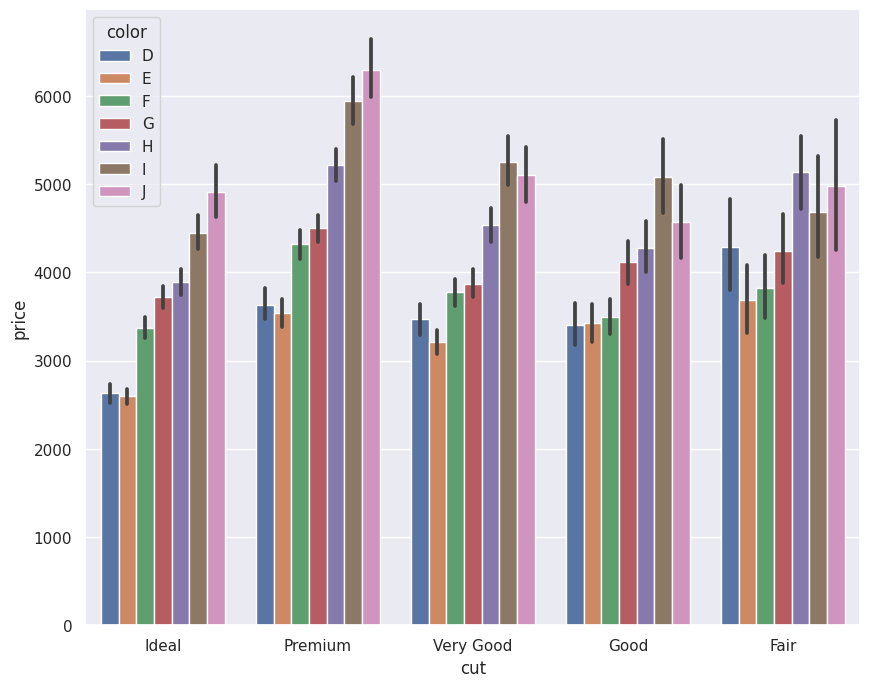

In [69]:
# Creating Bar Plots Grouped by a Specific Feature

ax = sns.barplot(x="cut", y="price", hue='color', data=diamonds_df)

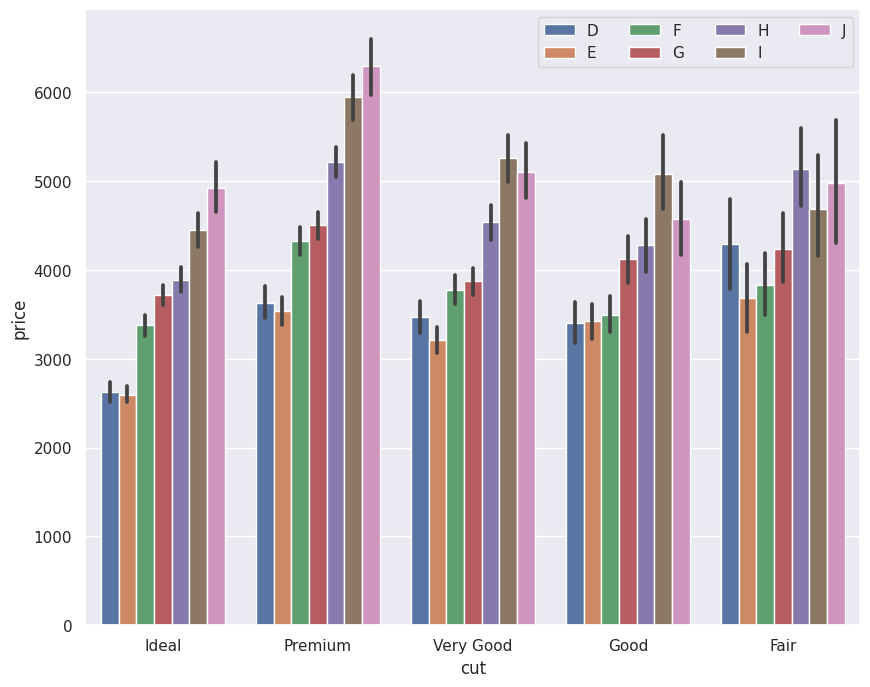

In [70]:
# place the legend location properly
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right',ncol=4)

Text(0, 0.5, 'Price ($)')

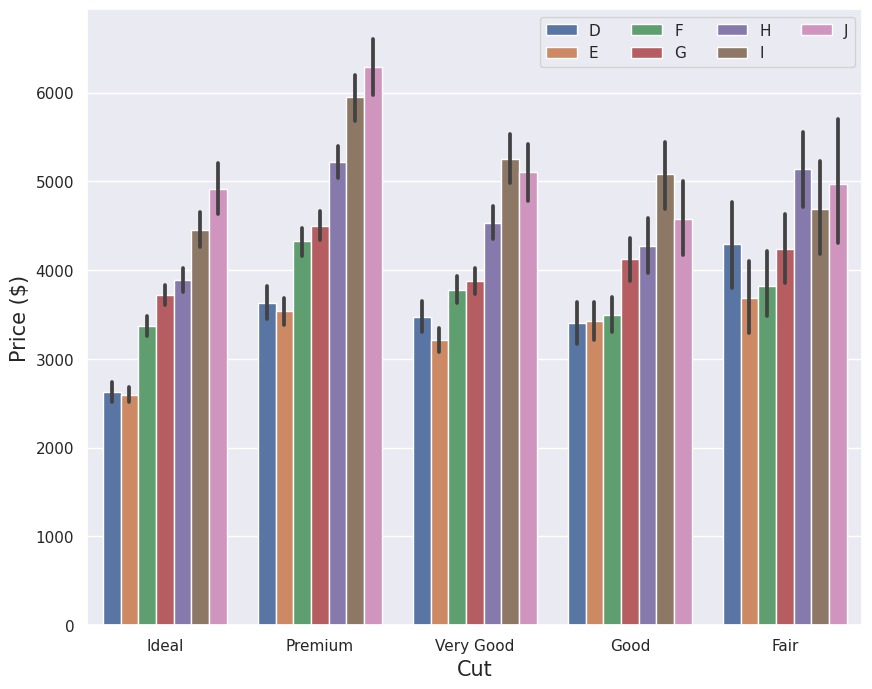

In [71]:
# Change axis labels

ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right',ncol=4)
ax.set_xlabel('Cut', fontdict={'fontsize' : 15})
ax.set_ylabel('Price ($)', fontdict={'fontsize' : 15})

[Text(0, 0, 'Ideal'),
 Text(1, 0, 'Premium'),
 Text(2, 0, 'Very Good'),
 Text(3, 0, 'Good'),
 Text(4, 0, 'Fair')]

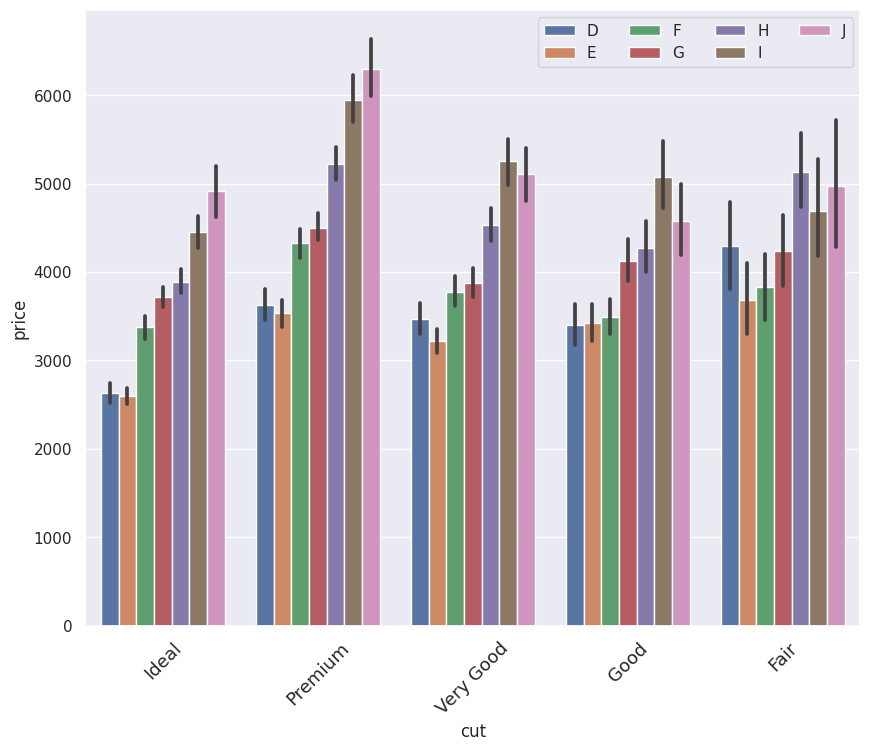

In [72]:
# set fontsize and rotation of x-axis tick labels, which is useful when the tick labels 
# are long and crowd up together on the x axis.

ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right',ncol=4)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=45)

# Plots that Present Global Patterns of a Dataset

# A scatter plot is a simple ...
plot presenting the values of two features in a dataset. Each datapoint is represented by a point with the x coordinate as the value of the first feature and the y coordinate as the value of the second feature. A scatter plot is a great tool to learn more about two such numerical attributes.

# Auto mpg dataset
Attribute Information:

-mpg: continuous

-cylinders: multi-valued discrete

-displacement: continuous

-horsepower: continuous

-weight: continuous

-acceleration: continuous

-model year: multi-valued discrete

-origin: multi-valued discrete

-car name: string (unique for each instance)

Missing Attribute Values: horsepower has 6 missing values

In [73]:
mpg_df = sns.load_dataset("mpg")
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


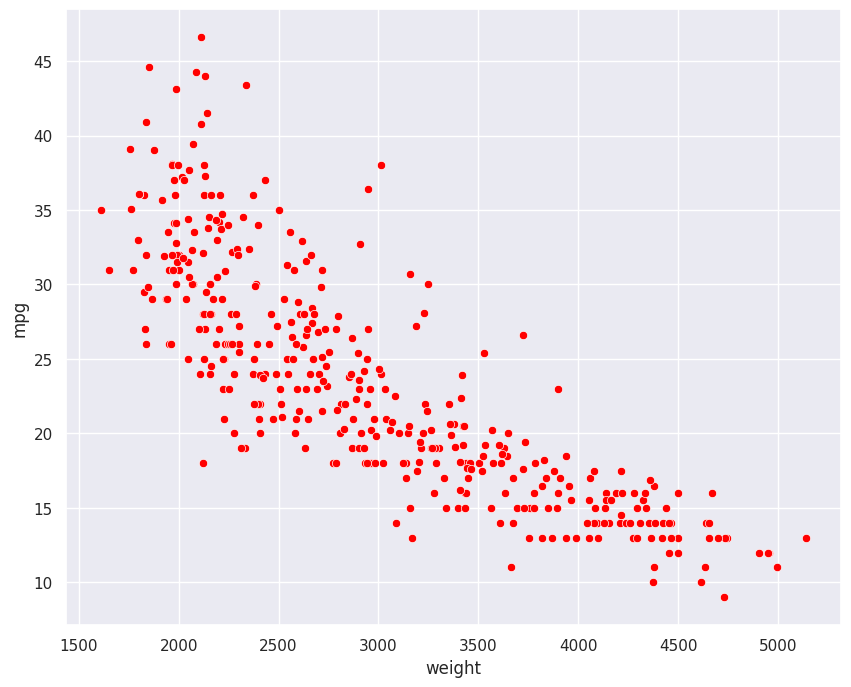

In [74]:
# The scatter plot shows a decline in mileage (mpg) with an increase in weight. 
# That's a useful insight into the relationships between different features in the dataset.

ax = sns.scatterplot(x="weight", y="mpg", data=mpg_df, color='red')


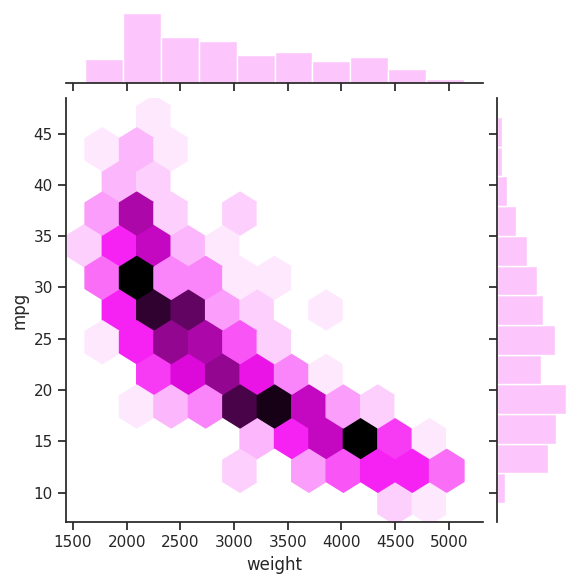

In [91]:
# Where there are lots of data points, the plotted points on a scatter plot can 
# end up overlapping, resulting in a messy graph. It can be hard to infer trends in such 
# cases. 

# A hexagonal binning plot (hexbin plot)columns correspond to numerical 
# attributes. Hexbin plots use hexagons to represent clusters of data points. 

# The darker bins indicate that there is a larger number of points in the corresponding ranges 
# of features on the x and y axes. The lighter bins indicate fewer points. The white space 
# corresponds to no points.

# set the plot style to include ticks on the axes. 
sns.set(style="ticks")

# hexbin plot; note the use of 'jointplot' here
sns.jointplot(data=mpg_df, x="weight", y="mpg", kind="hex", color="#FCB3FB")


# We could notice in the previous scatter plot that data points overlapped 
# heavily in certain areas, obscuring the actual distribution of the features. 
# Hexbin plots are quite a nice data visualization tool when data points are very dense.


<ipython-input-92-5e1ecb8288c0>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=mpg_df, x="weight", y="mpg", shade=True, color='yellow')


<Axes: xlabel='weight', ylabel='mpg'>

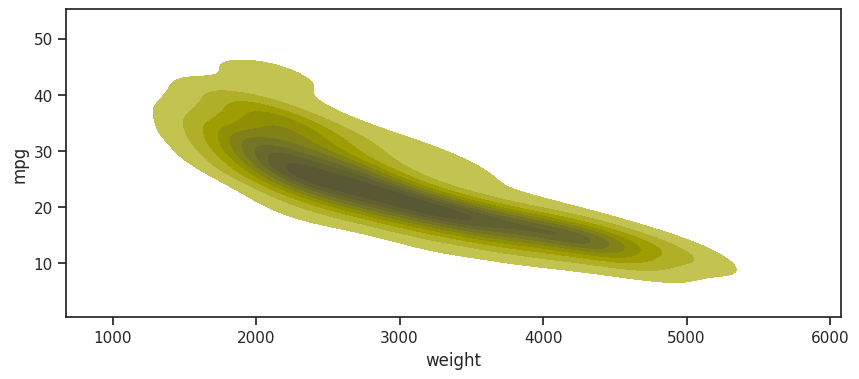

In [92]:
# Contour plot
# Another alternative to scatter plots when data points are densely populated in specific 
# region(s) is a contour plot. The advantage of using contour plots is the same as hexbin 
# plots – accurately depicting the distribution of features in the visualization in cases 
# where data points are likely to overlap heavily.

# contour plot
sns.set_style("ticks")  # style must be one of white, dark, whitegrid, darkgrid, ticks

# Generate KDE plot: 
# first two parameters are arrays of X and Y coordinates of data points;
# parameter shade is set to True so that the contours are filled with a color gradient based on number of data points

sns.kdeplot(data=mpg_df, x="weight", y="mpg", shade=True, color='yellow')

# We could make an interpretation of contour plots that the darker 
# regions indicate more data points and lighter regions indicate fewer data points.


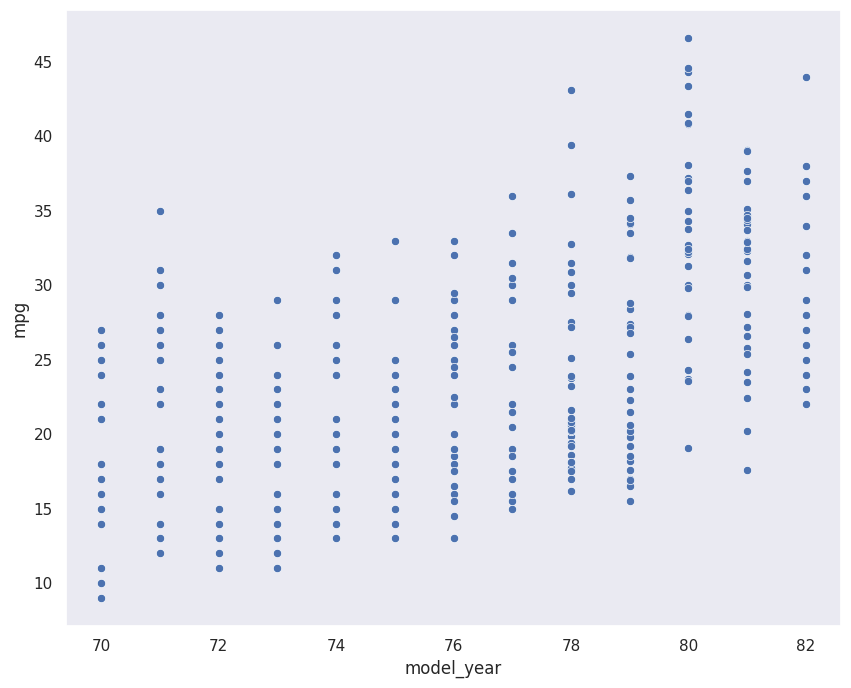

In [77]:
# Line plot
# Another kind of plot for presenting global patterns in data is a line plot.

# It represents information as a series of data points connected by straight-line 
# segments. They are useful for indicating the relationship between a discrete numerical 
# feature (on the x axis), such as model_year, and a continuous numerical feature (on the 
# y axis), such as mpg from the mpg dataset

# But first, look at the scatter plot
sns.set_style("dark")
ax1 = sns.scatterplot(x="model_year", y="mpg", data=mpg_df)

<ipython-input-78-13db562f1100>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.lineplot(x="model_year", y="mpg", data=mpg_df, color='green', ci=68)    # 68% of values fall in shaded region


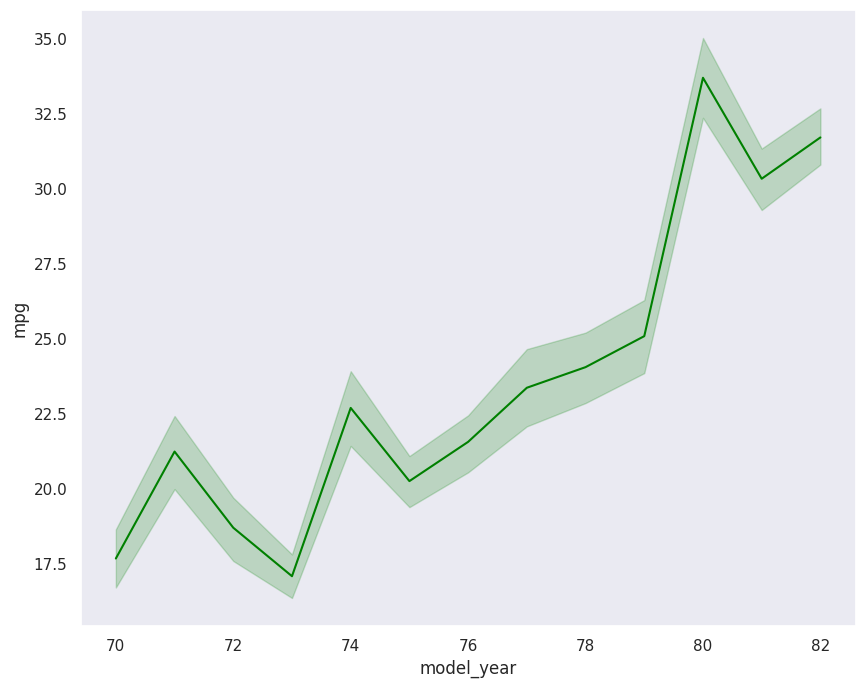

In [78]:
#  So when we have a discrete numerical feature like (model_year), drawing a line plot 
#  joining the data points is a good idea

# Line plots are great visualization techniques for scenarios where we have data that changes 
# over time – the x axis could represent date or time, and the plot would help to 
# visualize how a value varies over that period.

ax = sns.lineplot(x="model_year", y="mpg", data=mpg_df, color='green', ci=68)    # 68% of values fall in shaded region

# The points connected by the solid line represent the mean of the y axis feature at the corresponding x coordinate. 
# The shaded area around the line plot shows the confidence interval (CI) for the y axis feature (by default, Seaborn sets 
# this to a 95% confidence interval).


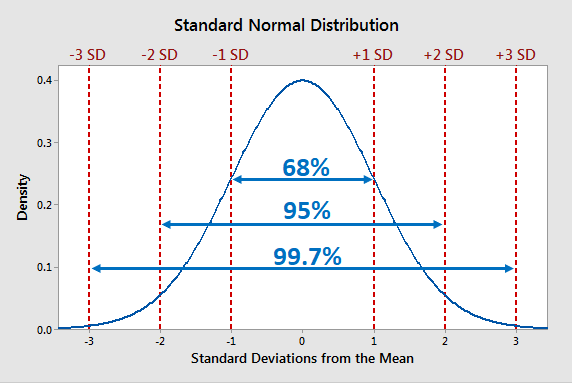

Credit: https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2021/08/empirical_rule_graph2.png?fit=572%2C384&ssl=1

<Axes: xlabel='model_year', ylabel='mpg'>

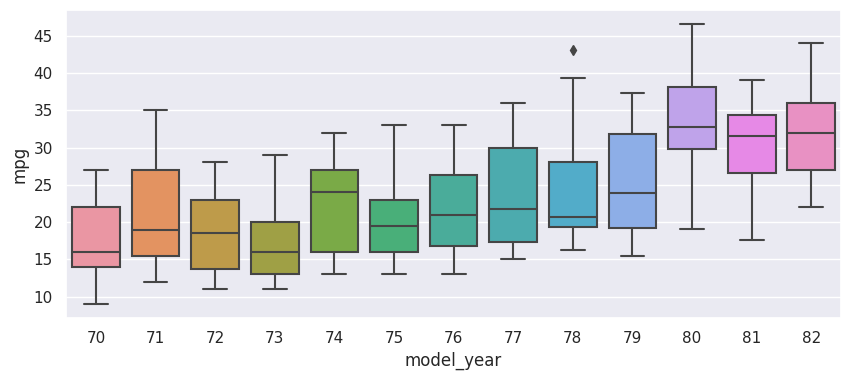

In [79]:
# Box plots:

# They are an excellent way to examine the relationship between the summary 
# statistics of a numerical feature in relation to other categorical features.
# So let's see the summary statistics of the mpg feature (mileage) classified by 
# another feature – the number of cylinders. A popular way to show such information is 
# to use box plots.

sns.set(rc={'figure.figsize':(10,4)})  # set a figure size as needed
sns.boxplot(x='model_year', y='mpg', data=mpg_df)


# The box boundaries indicate the interquartile range, the upper 
# boundary marks the 25% quartile, and the lower boundary marks the 75% quartile. 
# The horizontal line inside the box indicates the median. Any solo points outside 
# of the whiskers (the T-shaped bars above and below the box) mark outliers, while 
# the whiskers themselves show the minimum and maximum values that are not outliers.


<Axes: xlabel='model_decade', ylabel='mpg'>

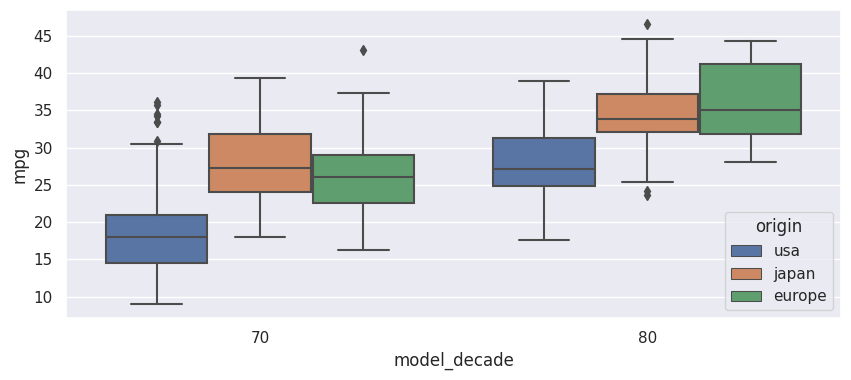

In [80]:

mpg_df['model_decade'] = np.floor(mpg_df.model_year/10)*10
mpg_df['model_decade'] = mpg_df['model_decade'].astype(int)

sns.boxplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')


<Axes: xlabel='model_decade', ylabel='mpg'>

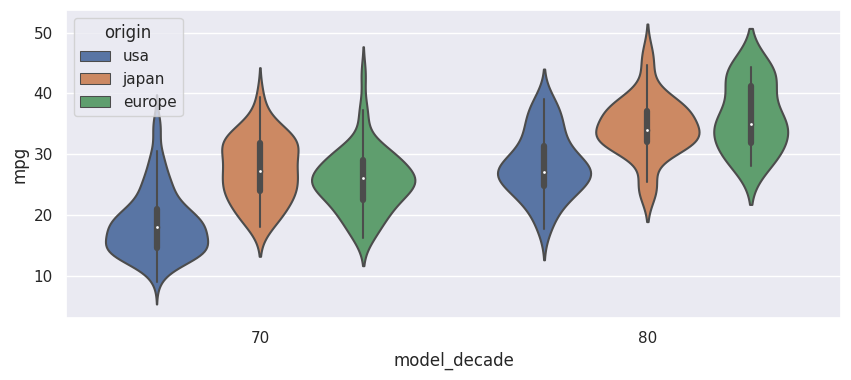

In [81]:
# Violin plot:

# A violin plot is similar to a box plot, but it includes more detail about variations in the data. 
# The shape of a violin plot tells you the shape of the data distribution –where the data points cluster around 
# a common value, the plot is fatter, and where there are fewer data points, the plot is thinner.


sns.violinplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')

# During the 70s, while most vehicles in the US had a median 
# mileage of 19 mpg, vehicles in Japan and Europe had median mileages of around 27 and 
# 25 mpg. While the mileages of vehicles in Europe and Japan jumped by 7 to 8 points in 
# the 80s, the median mileage of vehicles in the US was still similar to that of the vehicles 
# in Japan and Europe in the previous decade.


In [82]:
# Last, let's use the flights dataset from the seaborn library to generate a heatmap 
# depicting the number of passengers per month across the years 1949-1960.

flights_df = sns.load_dataset('flights')
flights_df


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


# Pandas
- Reshaping by pivoting DataFrame objects

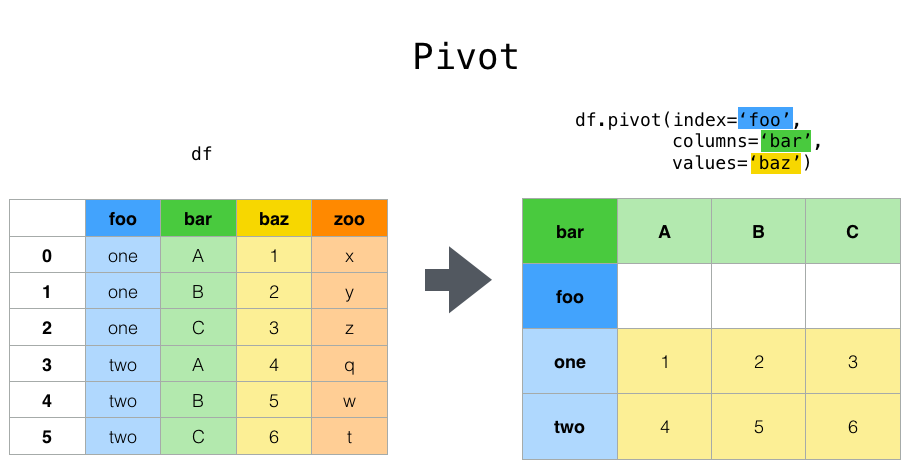

Ref: https://pandas.pydata.org/docs/user_guide/reshaping.html

<ipython-input-83-e9139db83ad5>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivoted = flights_df.pivot("month", "year", "passengers")


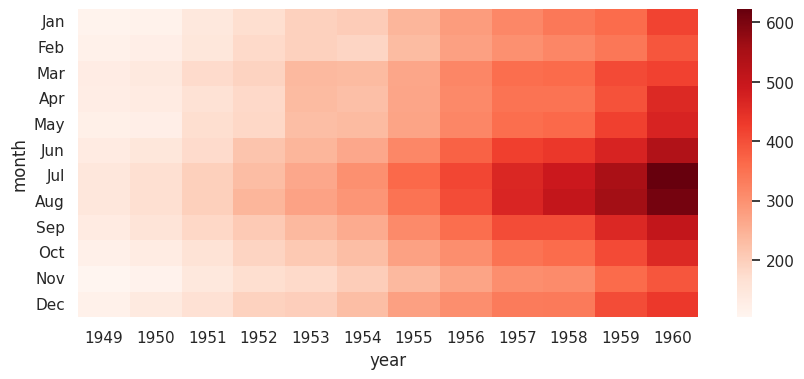

In [83]:

# Heatmap

# A heatmap is a visual representation of a specific continuous numerical feature as a 
# function of two other discrete features (either a categorical or a discrete numerical) 
# in the dataset. The information is presented in grid form – each cell in the grid 
# corresponds to a specific pair of values taken by the two discrete features and is 
# colored based on the value of the third numerical feature. 

# A heatmap is a great tool to visualize high-dimensional data and even to tease out features 
# that are particularly variable across different classes.

# First, use the pivot function, which takes as arguments the feature that will be displayed in rows, 
# then the one displayed in columns, and finally the feature whose variation we are interested in observing

df_pivoted = flights_df.pivot("month", "year", "passengers")

# Call a heatmap function
ax = sns.heatmap(df_pivoted,cmap="Reds")


In [84]:
# Notice that the total number of yearly flights increased steadily from 
# 1949 to 1960. Moreover, the months of July and August seem to have the largest 
# number of flights (compared to other months) across the years in observation. 
# Now, that's an interesting trend to find from a simple visualization!


### Plot a matrix dataset as a hierarchically-clustered heatmap.

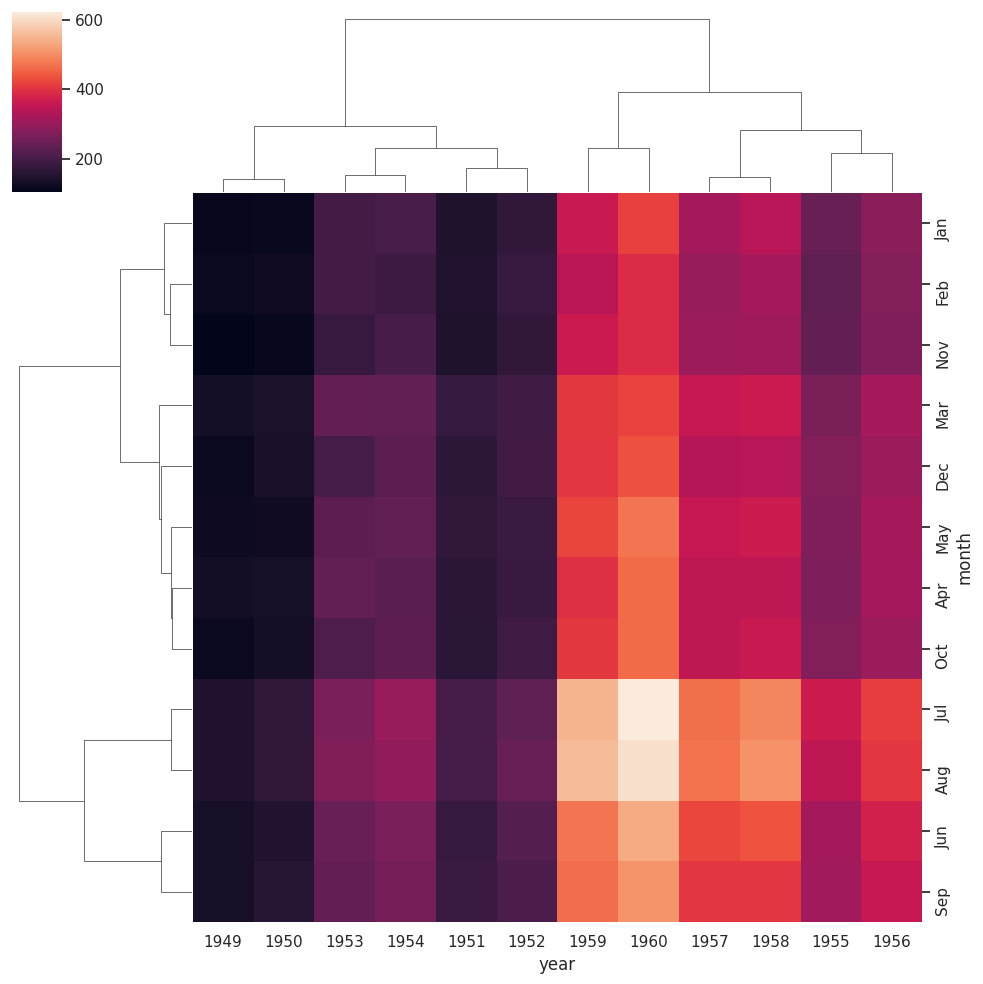

In [85]:
# In addition, heat maps comes with the clustering option and the distance metric as follows.

# A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation.

# Rows or columns in a heatmap can also be clustered based on the extent of their 
# similarity. To do this in seaborn, use the clustermap option.

# The rows/columns with the least distance between them are clustered closer 
# together than the ones with a greater distance between them. 

# We can set the distance metric to one of the many available options (manhattan, euclidean, 
# correlation, and others).

# Notic that the heatmap also clusters not just individual rows or columns, but also groups of rows and columns.


ax = sns.clustermap(df_pivoted, col_cluster=True, row_cluster=True,  metric= 'euclidean')  # metric= 'euclidean' by default.

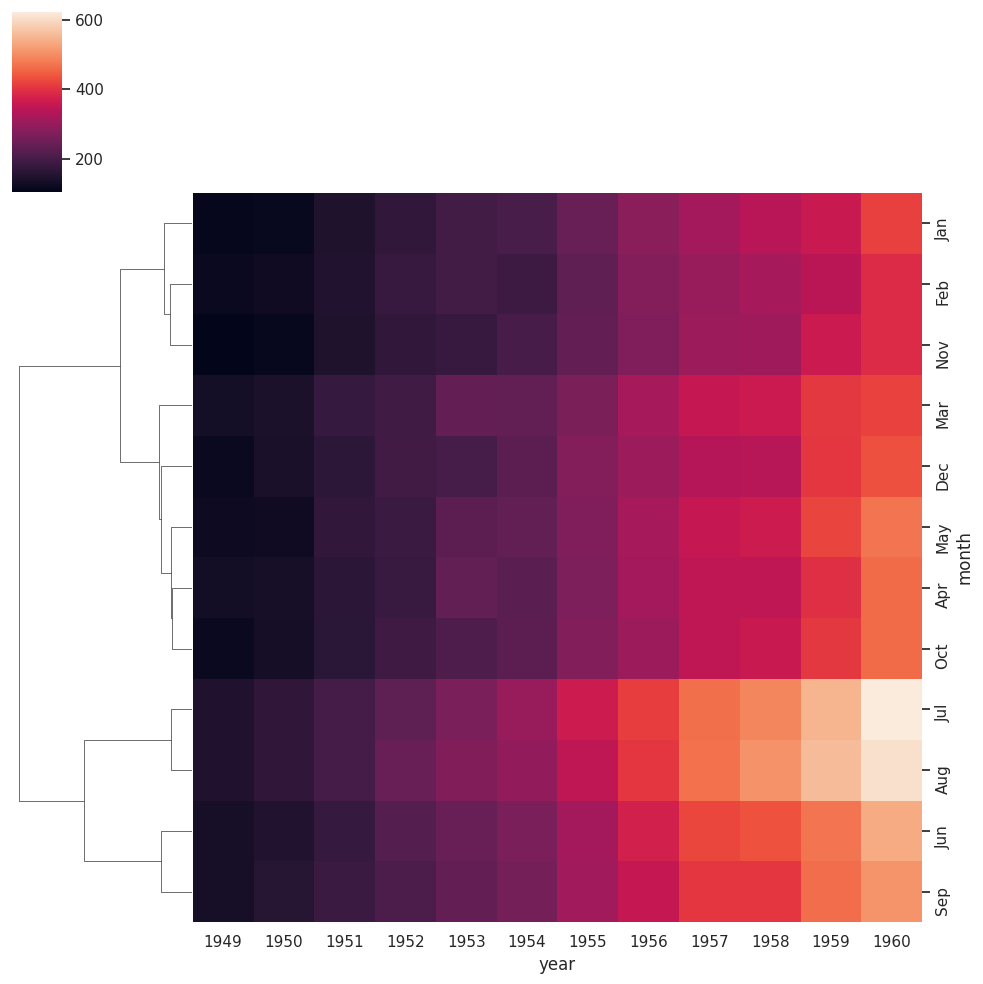

In [86]:
# Let's assume we are clustering rows. The first step in hierarchical clustering is to compute the distance 
# between all possible pairs of rows, and to select two rows, say, A and B, with the least 
# distance between them. Once these rows are grouped, they are said to be merged into a single cluster.

# The process is then repeated until there is only a single cluster left

ax = sns.clustermap(df_pivoted, col_cluster=False, row_cluster=True)  # metric= 'euclidean' by default.

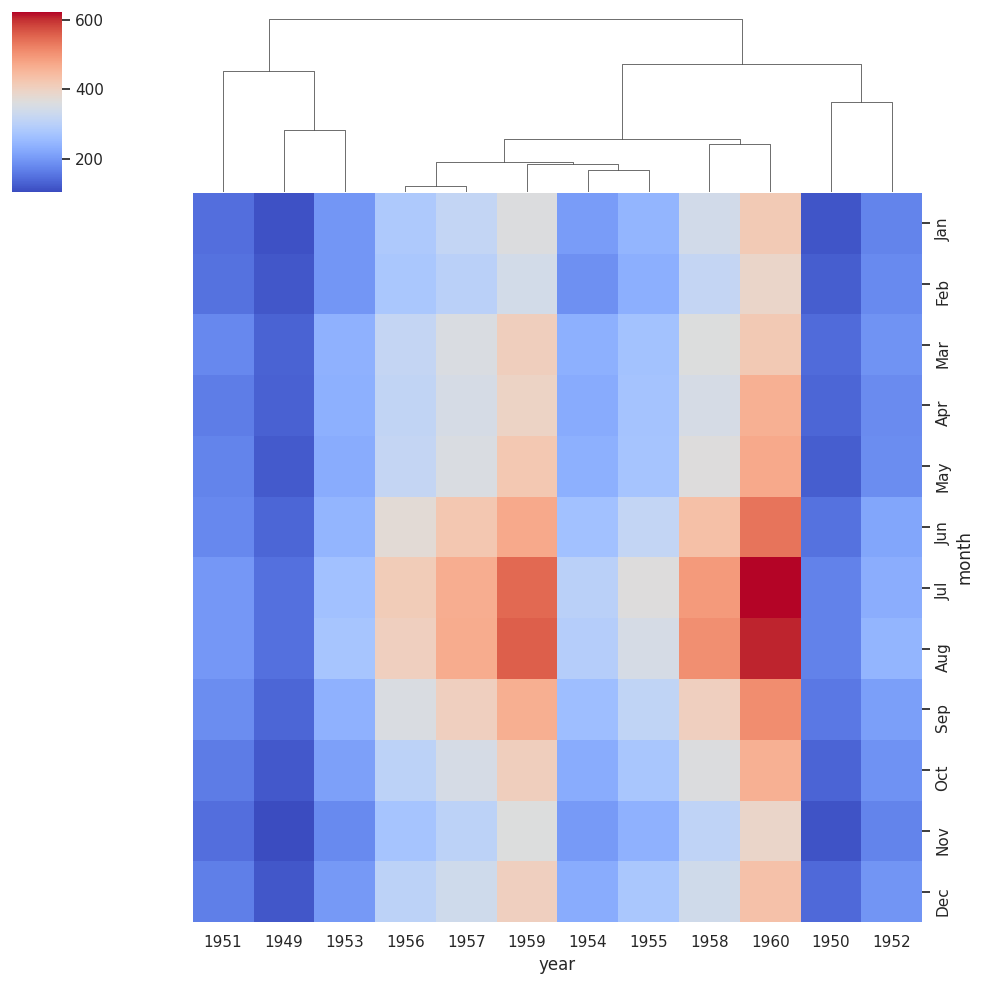

In [87]:

# The other direction of clustering, and a different used metric as well as another color map.

ax = sns.clustermap(df_pivoted, col_cluster=True, row_cluster=False, metric= 'correlation',cmap='coolwarm')

Done! :)